<a href="https://colab.research.google.com/github/sofiaIman/Machine-learning-Group4-Tasks/blob/main/group_4_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel


#**Data preprocessing**;

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing Pricing.csv to Housing Pricing.csv


In [ ]:
df=pd.read_csv("/content/Housing Pricing.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 77)

Check if there are columns with missing values; <br>it returns true meaning that there are missing values in the dataset

In [ ]:
df.isnull().values.any()

True

check which columns have missing values

In [ ]:
df.info()

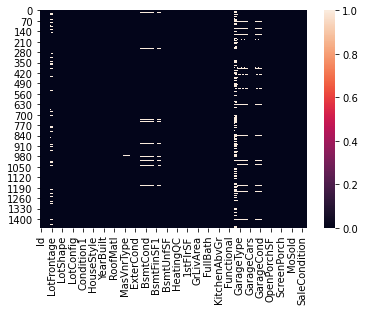

In [ ]:
sns.heatmap(df.isnull())

#Filling missing values

https://towardsdatascience.com/machine-learning-handling-missing-data-27b09ab146ba

visualizing categories

In [ ]:
df['MasVnrType'].value_counts(dropna=False).head(60)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

visualizing distribution

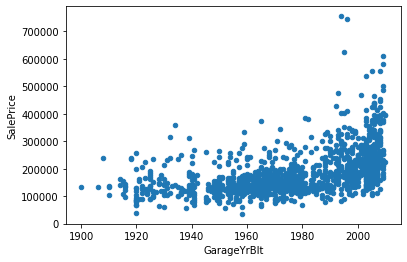

In [ ]:
df.plot(x = 'GarageYrBlt', y = 'SalePrice', kind = 'scatter') #?????????

In [ ]:
#fill with mean/mode/median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean()) #ok
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

#create new category '0'
for col in ('GarageYrBlt', 'MasVnrArea'):
    df[col] = df[col].fillna(0)

#create new category 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'FireplaceQu'):
    df[col] = df[col].fillna('None')


Check if there are columns with missing values

In [ ]:
df.isnull().values.any()

False

#Encoding

converting the categorical data to numeric representation

In [ ]:
pd.get_dummies(df.LotArea)

In [ ]:
X=dataset.iloc[:,:].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelencoder_X=LabelEncoder()

In [ ]:
X[:,3]=labelencoder_X.fit_transform(X[:,3])

#Z=labelencoder_X.fit_transform(X[:,3])

In [ ]:
Z=pd.DataFrame

In [ ]:
pd.get_dummies(df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


#Standardizing the dataset

representing weights with 0-1 ratios?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset.shape

(1460, 77)

Convert data to array

In [ ]:
dataset1=dataset
dataset1 = dataset1.values
dataset1

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [ ]:
categorical_features=list(dataset.select_dtypes(include=['object']).columns)
categorical_features

In [ ]:
all_features=list(dataset.columns)

In [ ]:
numerical=list(set(all_features)-set(categorical_features))
numerical

['EnclosedPorch',
 '2ndFlrSF',
 'MiscVal',
 'GarageCars',
 'OverallQual',
 'BsmtFullBath',
 'ScreenPorch',
 'GrLivArea',
 'KitchenAbvGr',
 'PoolArea',
 'BsmtFinSF2',
 'OverallCond',
 '1stFlrSF',
 'MoSold',
 '3SsnPorch',
 'MasVnrArea',
 'GarageYrBlt',
 'LotArea',
 'TotRmsAbvGrd',
 'SalePrice',
 'YearRemodAdd',
 'LowQualFinSF',
 'OpenPorchSF',
 'Fireplaces',
 'FullBath',
 'BsmtFinSF1',
 'LotFrontage',
 'BedroomAbvGr',
 'TotalBsmtSF',
 'WoodDeckSF',
 'GarageArea',
 'BsmtUnfSF',
 'BsmtHalfBath',
 'YrSold',
 'Id',
 'MSSubClass',
 'YearBuilt',
 'HalfBath']

In [ ]:
#dataset[numerical].drop('SalePrice',axis=1,inplace=True)

In [ ]:
x = pd.DataFrame(dataset[numerical].drop(labels=['SalePrice'], axis=1))
y= pd.DataFrame(dataset['SalePrice'])

Scaling the numerical data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Min_Max = MinMaxScaler()
X = Min_Max.fit_transform(x)
Y= Min_Max.fit_transform(y)
X,Y

(array([[0.        , 0.41355932, 0.        , ..., 0.23529412, 0.94927536,
         0.5       ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.75362319,
         0.        ],
        [0.        , 0.41937046, 0.        , ..., 0.23529412, 0.93478261,
         0.5       ],
        ...,
        [0.        , 0.55786925, 0.16129032, ..., 0.29411765, 0.5       ,
         0.        ],
        [0.20289855, 0.        , 0.        , ..., 0.        , 0.56521739,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.67391304,
         0.5       ]]), array([[0.24107763],
        [0.20358284],
        [0.26190807],
        ...,
        [0.321622  ],
        [0.14890293],
        [0.15636717]]))

In [ ]:
'''scaler = StandardScaler()
# transform data
scaled_dataset = scaler.fit_transform(dataset[numerical])
print(scaled_dataset)'''

'scaler = StandardScaler()\n# transform data\nscaled_dataset = scaler.fit_transform(dataset[numerical])\nprint(scaled_dataset)'

# Feature selection with L1

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [ ]:
#Selecting Numerical Columns
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
df = dataset[numerical_vars]
df.shape

(1460, 38)

In [ ]:
##Separating the data into training and tests set
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['MSSubClass', 'Id'], axis=1),
    df['MSSubClass'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [ ]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#Selecting features using Lasso regularisation
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
#Visualising features that were kept by the lasso regularisation
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#list of with the selected features
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))


total features: 36
selected features: 36
features with coefficients shrank to zero: 185


In [ ]:
selected_feat

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
X_train=X_train[selected_feat]

In [ ]:

X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
64,NaN,9375,7,5,1997,1998,573.0,739,0,318,1057,1057,977,0,2034,1,0,2,1,3,1,8,0,1998.0,2,645,576,36,0,0,0,0,0,2,2009,219500
682,NaN,2887,6,5,1996,1997,0.0,1003,0,288,1291,1291,0,0,1291,1,0,1,0,2,1,6,1,1996.0,2,431,307,0,0,0,0,0,0,11,2008,173000
960,50.0,7207,5,7,1958,2008,0.0,696,0,162,858,858,0,0,858,1,0,1,0,2,1,4,0,NaN,0,0,117,0,0,0,0,0,0,2,2010,116500
1384,60.0,9060,6,5,1939,1950,0.0,204,0,356,560,698,560,0,1258,0,0,1,0,2,1,6,0,1939.0,1,280,0,0,0,0,0,0,0,10,2009,105000
1100,60.0,8400,2,5,1920,1950,0.0,290,0,0,290,438,0,0,438,0,0,1,0,1,1,3,0,1930.0,1,246,0,0,0,0,0,0,0,1,2009,60000


# Train the Model

Building the model and architecture of the deep neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
'''
model = Sequential([
    Dense(*, activation='relu', input_shape=(10,)),#layer1 * neurons
    Dense(*, activation='relu'),#layer2 * neurons
    Dense(*, activation='relu'),#layer3 * neurons
    Dense(*, activation='sigmoid')
])'''

"\nmodel = Sequential([\n    Dense(*, activation='relu', input_shape=(10,)),#layer1 * neurons\n    Dense(*, activation='relu'),#layer2 * neurons\n    Dense(*, activation='relu'),#layer3 * neurons\n    Dense(*, activation='sigmoid')\n])"

In [ ]:
'''
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''

"\n# loss measuers how well the model did on training , and then tries to improve on it using the optimizer\nmodel.compile(optimizer='sgd',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n"

loss measures how well the model did on training , and then tries to improve on it using the optimizer

In [ ]:
'''model.fit(X_train, Y_train, batch_size=32, epochs=100,)'''

'model.fit(X_train, Y_train, batch_size=32, epochs=100,)'

In [ ]:
'''#[1] below returns the loss as the first element and the accuracy as the second element.
model.evaluate(X_test, Y_test)[1]'''

'#[1] below returns the loss as the first element and the accuracy as the second element.\nmodel.evaluate(X_test, Y_test)[1]'

Making a prediction

In [ ]:
'''
prediction = model.predict(X_test)
prediction  = [1 if y>=0.85 else 0 for y in prediction] #Threshold
print(prediction)
print(Y_test)'''

'#Make a prediction\nprediction = model.predict(X_test)\nprediction  = [1 if y>=0.85 else 0 for y in prediction] #Threshold\nprint(prediction)\nprint(Y_test)'